In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
crime_data = pd.read_csv('crime_data.csv')
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
crime_data.shape

(50, 5)

In [10]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [11]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


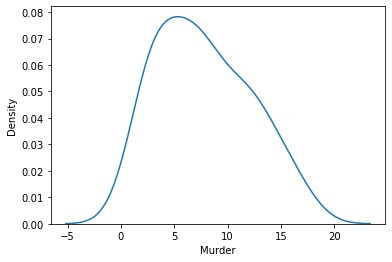

In [12]:
sns.distplot(crime_data['Murder'],hist=False)
plt.show()

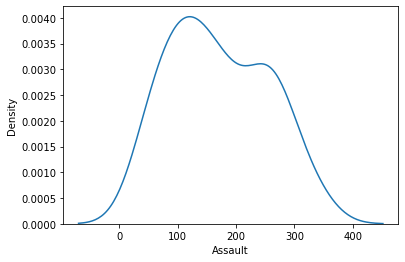

In [13]:
sns.distplot(crime_data['Assault'],hist=False)
plt.show()

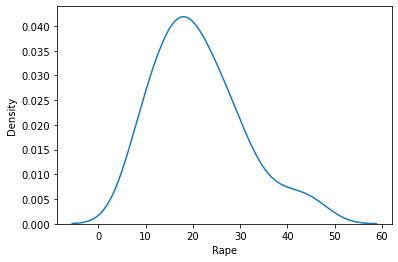

In [14]:
sns.distplot(crime_data['Rape'],hist=False)
plt.show()

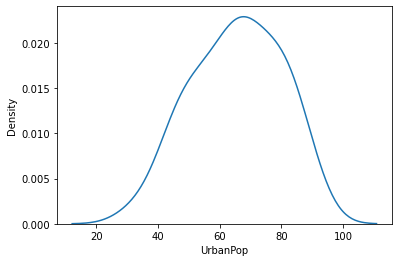

In [15]:
sns.distplot(crime_data['UrbanPop'],hist=False)
plt.show()

In [16]:
crime_data.rename(columns = {'Unnamed: 0' : 'Place'}, inplace=True)
crime_data.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
x = crime_data.drop(labels = 'Place', axis = 1)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x)

# Hierarchical Clustering

In [60]:
import scipy.cluster.hierarchy as sch

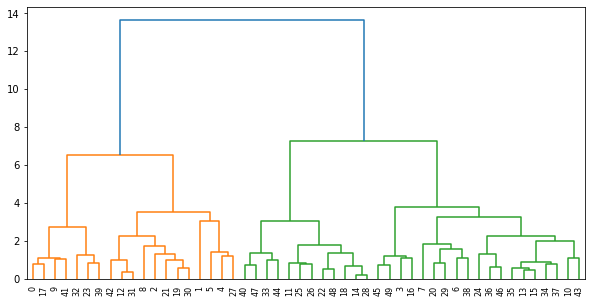

In [61]:
linkage = sch.linkage(x1,method='ward')
plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(linkage)

In [62]:
from sklearn.cluster import AgglomerativeClustering

In [63]:
hc = AgglomerativeClustering(n_clusters=4)

In [64]:
y_hc = hc.fit_predict(x1)
y_hc

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [65]:
clusters = pd.DataFrame(y_hc,columns = ['Clusters'])

In [77]:
clusters.head()

,Clusters
0,3
1,1
2,1
3,0
4,1


In [67]:
crime_data['Clusters']=clusters

In [78]:
crime_data.head()

,Place,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [69]:
df = crime_data.drop(labels='Place',axis=1)

In [79]:
df.sort_values(['Clusters']).head()

,Murder,Assault,UrbanPop,Rape,Clusters
24,9.0,178,70,28.2,0
46,4.0,145,73,26.2,0
45,8.5,156,63,20.7,0
43,3.2,120,80,22.9,0
38,3.4,174,87,8.3,0


In [71]:
clus_analys = df.groupby('Clusters').mean()

In [72]:
clus_analys

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


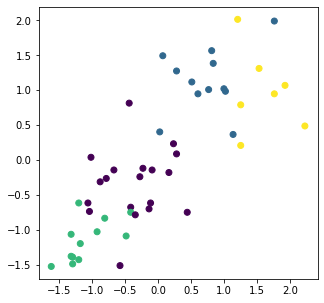

In [80]:
plt.figure(figsize=(5,5))  
plt.scatter(x1[:,0], x1[:,1], c= hc.labels_)

In [73]:
crime_data[crime_data['Clusters']==3]

,Place,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


### These cluster 3 places have HIGH CRIME RATE(MURDER, ASSAULT) and Considerable Rape Crime

In [74]:
crime_data[crime_data['Clusters']==2]

,Place,Murder,Assault,UrbanPop,Rape,Clusters
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2


### In Cluster 2, There is Very less number of Crimes happenping compared to the remaining Clusters

In [75]:
crime_data[crime_data['Clusters']==1]

,Place,Murder,Assault,UrbanPop,Rape,Clusters
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


### Cluster1 is most Dangerous city with higher number of Assualts, Rapes and Moderate Murders

In [76]:
crime_data[crime_data['Clusters']==0]

,Place,Murder,Assault,UrbanPop,Rape,Clusters
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
24,Missouri,9.0,178,70,28.2,0
29,New Jersey,7.4,159,89,18.8,0


### Cluster0 is moderate in all the crime numbers

## Cluster1 - Very Very Dangerous - Rank1
## Cluster3 - Very Dangerous         -  Rank2
## Cluster0 - Dangerous                  -  Rank3
## Cluster2 - Not so Dangerous      -  Rank4

# K-Means Clustering

In [19]:
from sklearn.cluster import KMeans

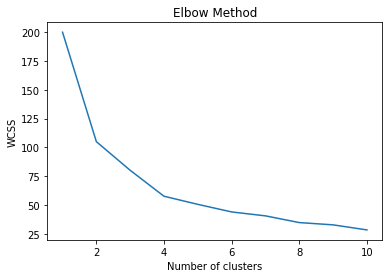

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
clusters = KMeans(n_clusters=4,random_state=123)

In [22]:
clusters.fit(x1)

KMeans(n_clusters=4, random_state=123)

In [24]:
clusters.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [25]:
crime_data['Clusters'] = clusters.labels_

In [27]:
crime_data.head()

,Place,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


In [28]:
crime_data.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


# DBSCAN

In [30]:
from sklearn.cluster import DBSCAN

In [127]:
dbs = DBSCAN(eps=1,min_samples=4)

In [128]:
dbs.fit(x1)

DBSCAN(eps=1, min_samples=4)

In [129]:
dbs.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [130]:
crime_data['Clusters'] = dbs.labels_

In [131]:
crime_data.head()

,Place,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1


In [132]:
crime_data.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143
